<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/intro_analytics_python/main/images/PA%20Banner.png" width="1000" align="center"></a>


# Probabilidad y estadística

Programa creado para mostrar ejemplos prácticos de los visto durante la clase\
v1.2

Objetivos: 
* Conocer el entorno de trabajo en Colab y Notebooks (Habilitar, conectar, guardar, bloques de texto y código, ejecución).
* Repasar las librerias de Numpy, Matplotlib y Seaborn.
* Implementar con numpy los indicadores de probabilidad como la media, mediana y desviación estandar. 
* Comunicar visualmente la distribución de los datos a través de gráficos de frecuencia, distribución y caja (boxplot).
* Comprender los outliers y su repercusión en la media, mediana y desviación estandar.

In [4]:
# Librerías a implementar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Repaso NumPy

In [5]:
# NumPy brinda una enorme variedad de formas rápidas y eficientes de crear 
# matrices y manipular datos numéricos homogéneos dentro de ellas.
# Una matriz es una cuadrícula de valores, que permite almacenar multiples valores en una sola variable.
# Una forma para inicializar las matrices es desde las listas de Python.
# Haciendo uso del método array() de Numpy(np).
# Fuente: https://numpy.org/doc/stable/user/absolute_beginners.html

matriz = np.array([1, 2, 3, 4, 5, 6])


# Indexación y corte (Acceder a elelmentos por partes o posición)
matriz[2]

3

In [6]:
# Se puede crear una matriz a partir de una secuencia de elementos, puede crear fácilmente una matriz llena de ceros.
# Con el método zeros() de NumPy(np) ---> np.zeros(cantidad_elementos)
matriz_ceros = np.zeros(5)
matriz_ceros

array([0., 0., 0., 0., 0.])

In [7]:
# Se puede crear una matriz de unos como elementos.
# Con el método: ones() de NumPy(np) ---> np.zeros(cantidad_elementos)
matriz_unos = np.ones(3)
matriz_unos

array([1., 1., 1.])

In [8]:
# Se puede crear una matriz con un rango de elementos.
# Con el método: arange() de NumPy(np) ---> np.arange(cantidad_elementos)
matriz_range = np.arange(4)
matriz_range

array([0, 1, 2, 3])

In [9]:
# También puede usar np.linspace() para crear una matriz con valores que están separados por la misma cantidad.
# Con el método: linspace() de NumPy(np) ---> np.linspace(desde, hasta,cantidad_elementos)
matriz_space = np.linspace(0,10,6)
matriz_space

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [10]:
# Se pueden concatenar las matrices con el método: concatenate() de NumPy(np) ---> np.concatenate()
matriz_a = np.array([1, 2, 3, 4])
matriz_b = np.array([5, 6, 7, 8])

matriz_concatenada = np.concatenate((matriz_a, matriz_b))
matriz_concatenada

# Si aparece el siguiente error:
# TypeError: only integer scalar arrays can be converted to a scalar index
# y tiene lo siguiente: np.concatenate(matriz_a, matriz_b)
# Es porque el método concatenate() espera como parámetro una tupla con las matrices
# a concatenar. Es por ello, que tiene doble (()), una del método y el otro de la tupla 
# con las matrices.

array([1, 2, 3, 4, 5, 6, 7, 8])

In [11]:
# Con shape, es una herramienta que muestra una tupla(nro_filas, nro_columnas) que indican el número de elementos almacenados a lo 
# largo de cada dimensión de la matriz.
matriz_concatenada.shape

(8,)

In [12]:
# COn reshape() se puede remodelar una matriz.
# Por ejemplo, puede remodelar esta edad a una matriz con dos filas y dos columnas:
edad = np.array([14,15,16,17])
edad_reshape = edad.reshape(2,2)
edad_reshape

array([[14, 15],
       [16, 17]])

In [13]:
# Se pueden filtrar matrices.
# Extraer los valores en la matriz que son menores a 16.
menore_16 = edad[edad<16]
menore_16


array([14, 15])

### Ejemplo NumPy y Matplotlib

Objetivo: Gráficar 1000 tiros de una moneda, cuya probabilidad de cara o ceca es de 1/2, que corresponde a 0.5

1.   Obtener los valores a gráficar, tanto para cara y ceca con arrays de NumPy (np.ones).
2.   Realizar una representación gráfica de tipo scatter con Matplotlib


  





In [91]:
cantidad_tiros = 20
probabilidad = 0.5

# El 1 representa a las caras.
# El 0 representa a las cecas.
# Armar un array que represente las 10 veces que puede salir una cara(1)
# Armar un array que represente las 10 veces que puede salir una ceca(0)
 
caras = 1 * np.ones(int(cantidad_tiros * probabilidad))
cecas = 0 * np.ones(int(cantidad_tiros * probabilidad))

In [96]:
# x_tiros almacena la lista de números que van del 0 al 20
x_tiros = range(cantidad_tiros)

In [102]:
# moneda almacena las dos matrices en una. Es decir, los 20 tiros
moneda = np.append(caras, cecas)

In [108]:
# np.random.shuffle() se encarga de mezclar una lista (reorganizar el orden de los elementos)
np.random.shuffle(moneda)

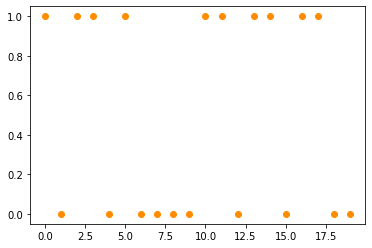

In [124]:
# De matplotlib se utiliza el método scatter para graficar, necesita los valores para el eje x
# y el eje y. Se necesita de Matplotlib el método show() para mostrar el gráfico.
# fig almacena el espacio para dibujar, a partir del método figure().
# ax almacena el espacio para configurar el gráfico.
# El método scatter es para realizar un gráfico de dispersión, que necesita valores
# para el eje x (x_tiros) y para el eje y(moneda)
# Por lo tanto, el gráfico mostrará los 20 tiros Y que salió en cada jugada.
# El parámetro color le asigna color a los puntos o línea del gráfico
# plt.show() para mostrar la figura

fig = plt.figure()
ax = plt.subplot()
ax.scatter(x_tiros, moneda, color="darkorange")
plt.show()

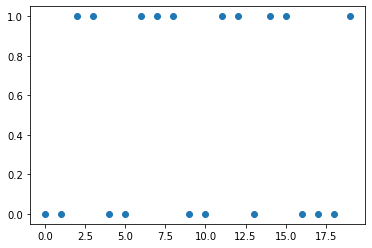

In [99]:
plt.scatter(x_tiros, moneda)
plt.show()

In [ ]:
## Todo puede estar dentro de un bloque de código
# cantidad_tiros = 20
# probabilidad = 0.5
# caras = 1 * np.ones(int(cantidad_tiros * probabilidad))
# cecas = 0 * np.ones(int(cantidad_tiros * probabilidad))
# x_tiros = range(cantidad_tiros)
# moneda = np.append(caras, cecas)
# np.random.shuffle(moneda)
# plt.scatter(x_tiros, moneda)
# plt.show()

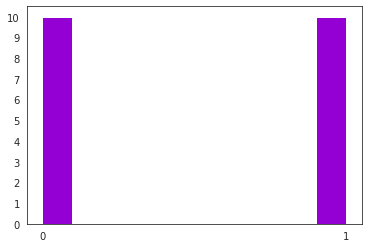

In [198]:
# Repaso  Matplotlib
# Es una biblioteca completa para crear visualizaciones en Python.
# El método hist() utiliza se utiliza para agrupar los datos en x, y contar la cantidad de valores en cada contenedor.
 # Fuente: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist
fig = plt.figure()
ax = plt.subplot()
ax.hist(moneda, color="darkviolet")
ax.set(xticks=np.arange(0, 2), yticks=np.arange(0,11)) # el método set configura los valores de los ejes
plt.show()

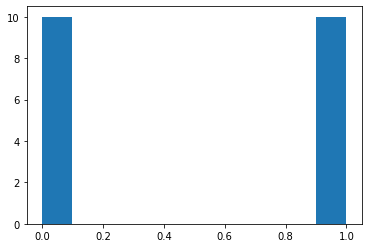

In [97]:
plt.hist(moneda)
plt.show()

### Seaborn


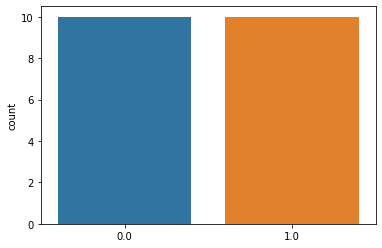

In [140]:
# Es un gráfico de conteo que se puede considerar como un histograma a través de una variable categórica, en lugar de cuantitativa. 
# Fuente: https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.countplot(x=moneda)
plt.show()

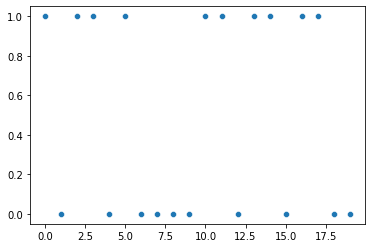

In [121]:
sns.scatterplot(x=x_tiros, y=moneda)
plt.show()

### Indicadores de probabilidad: media, mediana y desviación estandar

In [132]:
# crear una matriz con valores que están separados por la misma cantidad
y = np.linspace(0, 100, 100)

In [135]:
# Los métodos:
# mean() calcula promedio
# median() calcula el valor central de los datos.
# std() calcula la desviación estandar, que tan alejados están los datos de la media.
print("Promedio:", np.mean(y))
print("Mediana:", np.median(y))
print("Desvio:", np.std(y))

Promedio: 50.00000000000001
Mediana: 50.0
Desvio: 29.157646512850626


Distribución uniforme:


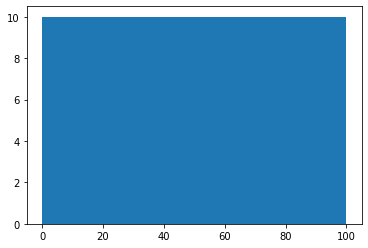

In [134]:
print("Distribución uniforme:")
plt.hist(y)
plt.show()

Promedio: 59.405940594059416
Mediana: 50.505050505050505
Desvio: 98.43232542030236


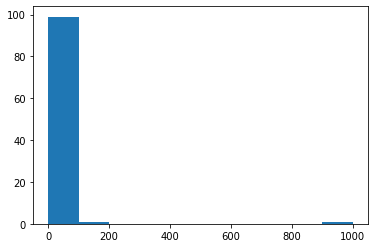

In [138]:
# Mismo rango de datos en un array llamado x
x = np.linspace(0, 100, 100)

# Agragando un valor alejando del grueso de datos.
# Para agregar el número 1000, debe tener el mismo formato de datos. Es decir, convertirlo en array. 
ruido = np.array(1000)  

# Para agregarlo a los demás datos se implementa el método append()
y2 = np.append(x, ruido) 

# Calculo de lo indicadores de probabilidad.
print("Promedio:", np.mean(y2))
print("Mediana:", np.median(y2))
print("Desvio:", np.std(y2))

# Representación gráfica a través de un histograma
plt.hist(y2)
plt.show()



Estos valores muy alejados del resto de los datos se los conoce como: 

*   "outliers" (valores atípicos o ruido) los cuales debemos indentificarlos y extraerlos.
*   Por otro lado, la "mediana" tiene mayor resilencia (se ve menos afetacada) por el ruido o valores atípicos.




### Ejemplo: Frecuencia de un colectivo

In [169]:
lunes = [12, 13, 12, 19, 17, 14, 11, 20, 19, 15 ,11 ,14 ,16 ,14 ,13 ,15 ,16 ,20 ,15 ,19 ,20 ,15 ,15 ,16 ,11 ,17 ,18 ,15 ,11 ,14 ,11 ,12 ,14 ,13 ,13 ,10 ,12 ,11 ,18 ,12 ,16 ,13 ,11]
martes = [11, 17, 11, 14, 16, 12, 13, 16, 16, 14, 13, 13, 15, 13, 17, 11, 14, 15, 11, 15, 14, 16, 11, 16, 12, 15, 15, 14, 12, 16, 13, 11, 16, 11, 12, 15, 15, 11, 11, 16, 12, 14, 12]
miercoles = [21, 21, 19, 16, 18, 17, 21, 20, 15, 21, 17, 15, 19, 19, 20, 16, 19, 19, 16, 15, 20, 20, 18, 17, 22, 21, 19, 18, 21, 20, 19, 15, 17, 16, 17, 19, 15, 16, 22, 20, 20, 16, 16]
jueves = [16, 12, 16, 15, 14, 18, 13, 18, 16, 14, 17, 18, 21, 14, 13, 18, 14, 19, 13, 21, 17, 18, 19, 22, 12, 20, 21, 14, 18, 21, 14, 21, 18, 14, 18, 19, 15, 21, 20, 21, 14, 21, 19]
viernes = [12, 16, 12,  8,  9, 16,  9, 15,  9,  7, 15,  8, 10,  9,  8,  8,  8, 16,  9, 11, 12, 12, 12, 15, 13, 15, 10,  9, 16, 15, 15, 17, 15,  8, 14, 8, 7, 10, 15,  9,  8, 16, 17]
sabado = [24, 34, 32, 20, 32, 27, 32, 22, 33, 21, 33, 27, 32, 26, 21, 34, 34, 26, 30, 26, 25, 30, 24, 34, 20, 23, 32, 28, 22, 21, 35, 23, 30, 27, 25, 23, 25, 28, 32, 27, 23, 23, 34]
print("Datos recolectados los lunes:", len(lunes))

Datos recolectados los lunes: 43


#### Frecuencia Lunes-Viernes


*   Gráficar la distribución de los datos.
*   Calcular los indicadores de probabilidad.




In [196]:
# Agregar toda la información a una variable y tranformar en un dato tipo array.
frecuencia = np.concatenate((lunes, martes, miercoles, jueves, viernes))

Datos ensayados: 215
Promedio: 15.06046511627907
Mediana: 15.0
Desvio: 3.5882326760057266


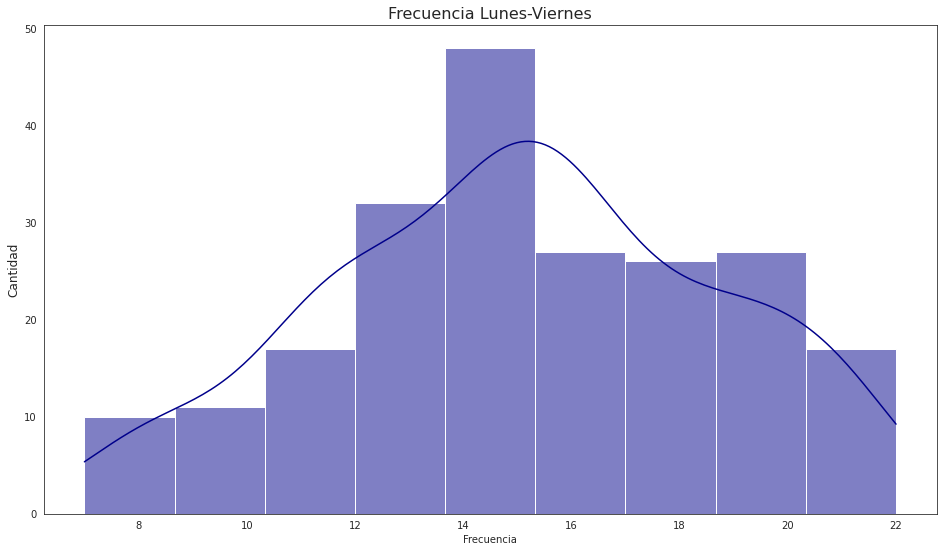

In [184]:

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()

# set_style("color"), agrega color de fondo 
sns.set_style("white")

# Se representará un histplot (histograma+línea)
# kde, parámetro que si es True, calcula una estimación de densidad kernel para suavizar la distribución y mostrarla en el gráfico como una o más líneas. 
# ax, son los ejes preexistentes para la trama.
ax = sns.histplot(x=frecuencia, kde=True, color="darkBlue", ax=ax)
ax.set_title("Frecuencia Lunes-Viernes", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia))
print("Promedio:", np.mean(frecuencia))
print("Mediana:", np.median(frecuencia))
print("Desvio:", np.std(frecuencia))
plt.show()

### Gráfico de caja (Boxplot)

Datos ensayados: 215
Promedio: 15.06046511627907
Mediana: 15.0
Desvio: 3.5882326760057266


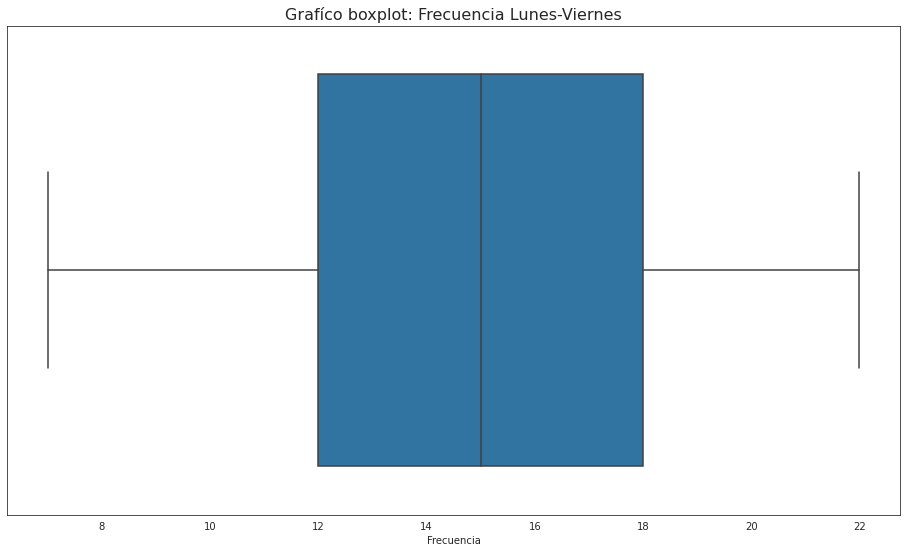

In [187]:
# sns.boxplot() Método de Seaborn para el gráfico de caja
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax = sns.boxplot(x=frecuencia, ax=ax)
ax.set_title("Grafíco boxplot: Frecuencia Lunes-Viernes", fontsize=16) # Agrega título al gráfico
ax.set_xlabel('Frecuencia') # Identifica al eje x con nombre.

print("Datos ensayados:", len(frecuencia))
print("Promedio:", np.mean(frecuencia))
print("Mediana:", np.median(frecuencia))
print("Desvio:", np.std(frecuencia))
plt.show()

#### Frecuencia Lunes-Sábados

In [202]:
# Transformando los datos del sabado a un array.
sabado = np.array(sabado)

Datos ensayados: 258
Promedio: 17.124031007751938
Mediana: 16.0
Desvio: 5.965674100376816


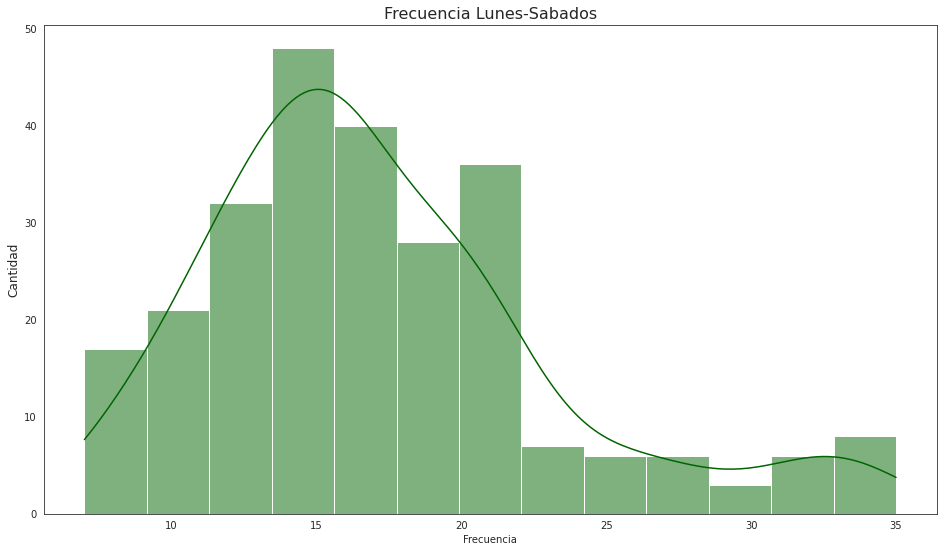

In [203]:
# Agregar a la variable frecuencia los datos del sábado.
frecuencia2 = np.append(frecuencia, sabado)

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
    
sns.set_style("white")
        
ax = sns.histplot(x=frecuencia2, kde=True, color="darkgreen", ax=ax)
ax.set_title("Frecuencia Lunes-Sabados", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia2))
print("Promedio:", np.mean(frecuencia2))
print("Mediana:", np.median(frecuencia2))
print("Desvio:", np.std(frecuencia2))
plt.show()

##### Otra forma de verlo con el gráfico de caja (Boxplot)

Datos ensayados: 258
Promedio: 17.124031007751938
Mediana: 16.0
Desvio: 5.965674100376816


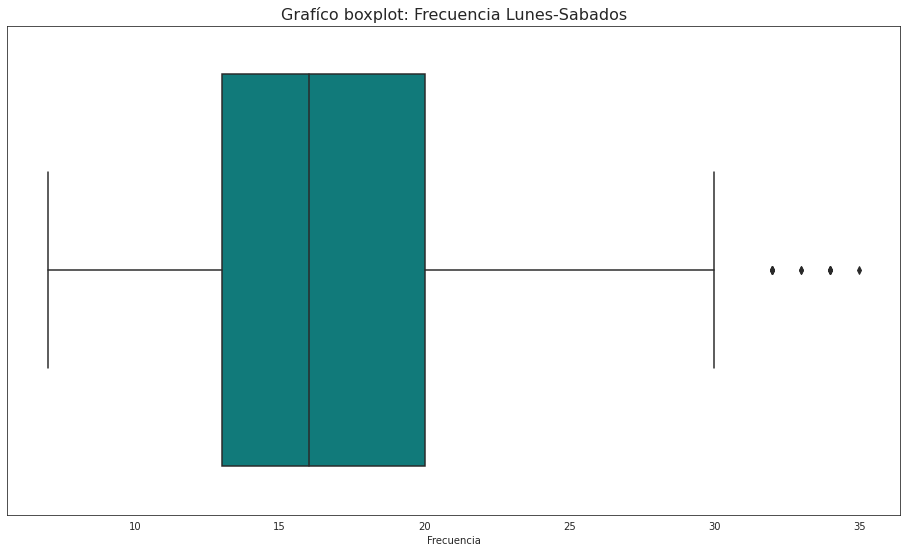

In [195]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax = sns.boxplot(x=frecuencia2, ax=ax, color="darkcyan")
ax.set_title("Grafíco boxplot: Frecuencia Lunes-Sabados", fontsize=16)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(frecuencia2))
print("Promedio:", np.mean(frecuencia2))
print("Mediana:", np.median(frecuencia2))
print("Desvio:", np.std(frecuencia2))
plt.show()

#### Frecuencia solo sábados

Datos ensayados: 43
Promedio: 27.441860465116278
Mediana: 27.0
Desvio: 4.627030418330738


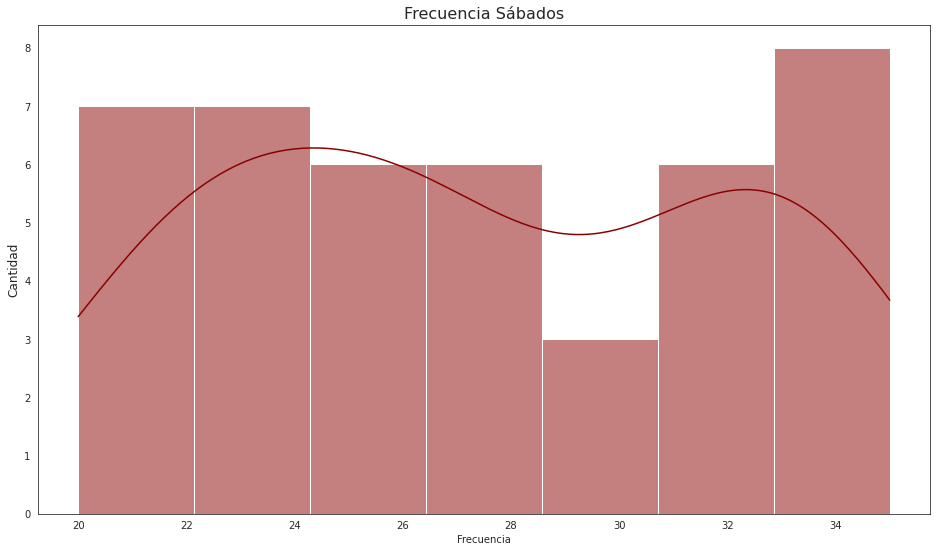

In [207]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
    
sns.set_style("white")

ax = sns.histplot(x=sabado, kde=True, color="darkred", ax=ax)
ax.set_title("Frecuencia Sábados", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Frecuencia')

print("Datos ensayados:", len(sabado))
print("Promedio:", np.mean(sabado))
print("Mediana:", np.median(sabado))
print("Desvio:", np.std(sabado))
plt.show()